## Impact of Game Updates on Player Retention

--- 

### Project Overview
**Objective:** Through the power of data science, analyze how large game updates impact player retention levels and activity levels in "The Isle", "ARK: Survival Evolved", and "No Man's Sky".

### Scope and Purpose
**Data Field:** Gaming  
**Data Types:** 
- Player count data over time
- Game update logs
- User reviews in relation to update times

**Questions to Explore:**
1. **General Impact of Updates on Player Retention:**
   - How do major updates affect the player count in the days and weeks following the update?
   - Is there a noticeable increase or decrease in player retention immediately after an update?

2. **Frequency of Updates and Player Activity:**
   - How does the frequency of updates (e.g., monthly vs. quarterly) impact player retention and activity levels?
   - Are more frequent updates associated with higher or lower player engagement between updates?

3. **Types of Updates and Their Effectiveness:**
   - Do updates that introduce new content have a more significant impact on player retention compared to bug fixes or balance changes?
   - How do different types of updates affect long-term player engagement?

4. **Comparative Analysis Across Multiple Games:**
   - How do player retention trends following updates compare between "The Isle", "ARK: Survival Evolved", and "No Man's Sky"?
   - Are there differences in how frequent or less frequent updates affect player counts across these games?


#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


#### 1.1) Load the data:

In [23]:
# Load the CSV files into DataFrames
isle_players = pd.read_csv('Isle/Isle_player_data.csv')
ark_players = pd.read_csv('Ark/ark_evolved_player_data.csv')
noman_players = pd.read_csv('Noman/Nomansky_player_data.csv')

isle_updates = pd.read_csv('Isle/The_isle_update_data.csv')
ark_updates = pd.read_csv('Ark/ark_updates_collection.csv')
noman_updates = pd.read_csv('Noman/Noman_updates_collection.csv')

# Display the column names for each DataFrame
print("Isle Players Columns:")
print(isle_players.columns)
print("\nArk Players Columns:")
print(ark_players.columns)
print("\nNoman Players Columns:")
print(noman_players.columns)
print("\nIsle Updates Columns:")
print(isle_updates.columns)
print("\nArk Updates Columns:")
print(ark_updates.columns)
print("\nNoman Updates Columns:")
print(noman_updates.columns)

Isle Players Columns:
Index(['Month', 'Avg Players', 'Peak Players'], dtype='object')

Ark Players Columns:
Index(['Month', 'Avg Players', 'Peak Players'], dtype='object')

Noman Players Columns:
Index(['Month', 'Avg Players', 'Peak Players'], dtype='object')

Isle Updates Columns:
Index(['Title', 'Date', 'Category'], dtype='object')

Ark Updates Columns:
Index(['Date', 'Version', 'Num_Changes', 'Changes', 'Category'], dtype='object')

Noman Updates Columns:
Index(['Category', 'Title', 'Date'], dtype='object')


#### 3) Parse Dates:


1. **Purpose**: Converts date strings into `datetime` objects.
2. **First Attempt**: 
   - **Format**: `%B %Y` (e.g., "January 2023")
   - **Function**: `pd.to_datetime(value, format='%B %Y', errors='coerce')`
   - **Behavior**: Converts date strings matching this format. Invalid formats are turned into `NaT` (Not a Time).
3. **Second Attempt**:
   - **Format**: `%d-%m-%Y` (e.g., "31-12-2023")
   - **Function**: `pd.to_datetime(value, format='%d-%m-%Y', errors='coerce')`
   - **Behavior**: Converts date strings matching this format. Invalid formats are turned into `NaT`.
4. **Fallback**: If neither format works, returns `pd.NaT`.



In [24]:
# Print statements to check the dates without parsed
print("Isle Players 'Month' column before parsing:")
print(isle_players['Month'].head

print("\nArk Players 'Month' column before parsing:")
print(ark_players['Month'].head())

print("\nNoman Players 'Month' column before parsing:")
print(noman_players['Month'].head())

def parse_date(value):
    try:
        return pd.to_datetime(value, format='%B %Y', errors='coerce')
    except ValueError:
        try:
            return pd.to_datetime(value, format='%d-%m-%Y', errors='coerce')
        except ValueError:
            return pd.NaT

# Apply date parsing to player data
isle_players['Month'] = isle_players['Month'].apply(parse_date)
ark_players['Month'] = ark_players['Month'].apply(parse_date)
noman_players['Month'] = noman_players['Month'].apply(parse_date)

# Remove the first row from each DataFrame
isle_players = isle_players.drop(0).reset_index(drop=True)
ark_players = ark_players.drop(0).reset_index(drop=True)
noman_players = noman_players.drop(0).reset_index(drop=True)

# Print statements to check the parsed dates
print("Isle Players 'Month' column after parsing:")
print(isle_players['Month'].head())

print("\nArk Players 'Month' column after parsing:")
print(ark_players['Month'].head())

print("\nNoman Players 'Month' column after parsing:")
print(noman_players['Month'].head())


Isle Players 'Month' column after parsing:
0    Last 30 Days
1       June 2024
2        May 2024
3      April 2024
4      March 2024
Name: Month, dtype: object

Ark Players 'Month' column after parsing:
0    Last 30 Days
1       June 2024
2        May 2024
3      April 2024
4      March 2024
Name: Month, dtype: object

Noman Players 'Month' column after parsing:
0    Last 30 Days
1       June 2024
2        May 2024
3      April 2024
4      March 2024
Name: Month, dtype: object
Isle Players 'Month' column after parsing:
0   2024-06-01
1   2024-05-01
2   2024-04-01
3   2024-03-01
4   2024-02-01
Name: Month, dtype: datetime64[ns]

Ark Players 'Month' column after parsing:
0   2024-06-01
1   2024-05-01
2   2024-04-01
3   2024-03-01
4   2024-02-01
Name: Month, dtype: datetime64[ns]

Noman Players 'Month' column after parsing:
0   2024-06-01
1   2024-05-01
2   2024-04-01
3   2024-03-01
4   2024-02-01
Name: Month, dtype: datetime64[ns]


- **Before Parsing:**
  - **Isle, Ark, Noman Players:**
    - The 'Month' column contained entries like "Last 30 Days", "June 2024", "May 2024", etc.
    - These values were not yet converted into datetime format.

- **After Parsing:**
  - **Isle, Ark, Noman Players:**
    - The 'Month' column now contains dates in `YYYY-MM-DD` format, such as "2024-06-01".
    - Entries like "Last 30 Days" could not be parsed and were not converted, resulting in `NaT` (Not a Time).

#### 4) Standardize Date Format for Update Logs:

1. **Standardize Date Format**: 
   - Convert the `Date` columns in the `isle_updates`, `ark_updates`, and `noman_updates` DataFrames into a standard `datetime` format.

2. **Add 'Month' Column**: 
   - Extract month and year from the now standardised 'Date' columns and add a new column, 'Month', to each DataFrame for easier data alignment across different DataFrames for monthly comparisons.

In [26]:
# Standardize date format for update logs
isle_updates['Date'] = pd.to_datetime(isle_updates['Date'], errors='coerce')
ark_updates['Date'] = pd.to_datetime(ark_updates['Date'], errors='coerce')
noman_updates['Date'] = pd.to_datetime(noman_updates['Date'], errors='coerce')

# Add a 'Month' column to update logs for alignment
isle_updates['Month'] = isle_updates['Date'].dt.to_period('M')
ark_updates['Month'] = ark_updates['Date'].dt.to_period('M')
noman_updates['Month'] = noman_updates['Date'].dt.to_period('M')

# Print statements to check the 'Date' and 'Month' columns after standardization
print("\nIsle Updates 'Date' column after standardization:")
print(isle_updates['Date'].head())

print("\nArk Updates 'Date' column after standardization:")
print(ark_updates['Date'].head())

print("\nNoman Updates 'Date' column after standardization:")
print(noman_updates['Date'].head())

print("\nIsle Updates 'Month' column after standardization:")
print(isle_updates['Month'].head())

print("\nArk Updates 'Month' column after standardization:")
print(ark_updates['Month'].head())

print("\nNoman Updates 'Month' column after standardization:")
print(noman_updates['Month'].head())


Isle Updates 'Date' column after standardization:
0   2023-06-23 18:05:14
1   2022-12-24 03:35:40
2   2022-08-22 21:14:40
3   2022-07-14 01:56:29
4   2021-12-16 09:34:19
Name: Date, dtype: datetime64[ns]

Ark Updates 'Date' column after standardization:
0   2023-05-04
1   2023-05-04
2   2023-04-26
3   2023-04-14
4   2023-04-12
Name: Date, dtype: datetime64[ns]

Noman Updates 'Date' column after standardization:
0   2021-02-19 14:45:50
1   2021-02-17 07:40:00
2   2020-06-12 16:25:20
3   2020-04-16 13:50:00
4   2019-08-15 15:57:34
Name: Date, dtype: datetime64[ns]

Isle Updates 'Month' column after standardization:
0    2023-06
1    2022-12
2    2022-08
3    2022-07
4    2021-12
Name: Month, dtype: period[M]

Ark Updates 'Month' column after standardization:
0    2023-05
1    2023-05
2    2023-04
3    2023-04
4    2023-04
Name: Month, dtype: period[M]

Noman Updates 'Month' column after standardization:
0    2021-02
1    2021-02
2    2020-06
3    2020-04
4    2019-08
Name: Month, dtype:

#### Analysis:

- **Isle Players Data**:
  
  - The 'Month' column is not yet parsed: relative terms mixed with month–year combinations.
 
   - After parsing, it can be standardized to datetime format perfectly between February 2024 through June 2024.

- **Ark Players Data**:
    - Initially, the values of column 'Month' are as in Isle, represented by relative terms and month–year format.
  - When post-parsing, it turns into datetime, covering the months from February 2024 to June 2024.

- **Noman Players Data**:
  - The 'Month' column before parsing is in mixed formats just like Isle and Ark.
  - When parsed, it standardizes into datetime, covering February 2024 through June 2024.

- **Isle Updates Data**:
  - The 'Date' column initially holds timestamps in mixed formats.
   - Dates are standardised to the `datetime64[ns]` type, and its value ranges from December 2021 to June 2023.
   - The 'Month' column is derived as periods, spanning from December 2021 to June 2023.

- **Ark Updates Data:**
   - Dates are standardised from various formats into `datetime64[ns]` type. It ranged from April 2023 to May 2023.
   -  The value range for the 'Month' column has been correct for this period.

- **Noman Updates Data:**
   - Dates are first represented in different timestamp formats.
  - Standardized dates range from August 2019 to February 2021.
  - The 'Month' column thus spans the accurate period.

#### 5) Convert Player Activity Data to Period:

1. **Convert 'Month' to Period**:
   - The code transforms the 'Month' column in each player's DataFrame (`isle_players`, `ark_players`, and `noman_players`) from a `datetime` format to a `Period` format with a monthly frequency. 
   - Using `dt.to_period('M')` converts each date into a period that represents a specific month and year, facilitating easier monthly comparisons and aggregations across the data.

In [27]:
# Convert player activity data 'Month' to Period
isle_players['Month'] = isle_players['Month'].dt.to_period('M')
ark_players['Month'] = ark_players['Month'].dt.to_period('M')
noman_players['Month'] = noman_players['Month'].dt.to_period('M')

# Print statements to check the conversion to periods
print("Isle Players 'Month' column after conversion to Period:")
print(isle_players['Month'].head())

print("\nArk Players 'Month' column after conversion to Period:")
print(ark_players['Month'].head())

print("\nNoman Players 'Month' column after conversion to Period:")
print(noman_players['Month'].head())


Isle Players 'Month' column after conversion to Period:
0    2024-06
1    2024-05
2    2024-04
3    2024-03
4    2024-02
Name: Month, dtype: period[M]

Ark Players 'Month' column after conversion to Period:
0    2024-06
1    2024-05
2    2024-04
3    2024-03
4    2024-02
Name: Month, dtype: period[M]

Noman Players 'Month' column after conversion to Period:
0    2024-06
1    2024-05
2    2024-04
3    2024-03
4    2024-02
Name: Month, dtype: period[M]


#### 6) Merge Player Activity Data with Update Logs:

1. **Merge Player Activity with Update Logs**:
   - Here, for each player activity DataFrame (`isle_players`, `ark_players`, `noman_players`), the code merges its data with the corresponding update logs DataFrame (`isle_updates`, `ark_updates`, `noman_updates`).
    - Merge the `Month` column so that the player activity data can align with the update logs in respect to the column month. `how=left. is a parameter that would retain every record from the player activities DataFrames and would carry records that have a match from the update logs DataFrames.
   
2. **Show Data Merged**:
    - The concatenated DataFrames (`isle_ct`, `ark_ct`, `noman_ct`) are printed using `head()`, which will print the first few lines of it for you to inspect and make sure that the parts of the merging operation are done correctly and that the data is aligned as desired.

In [28]:
# Merge player activity data with update logs
isle_merged = pd.merge(isle_players, isle_updates, on='Month', how='left')
ark_merged = pd.merge(ark_players, ark_updates, on='Month', how='left')
noman_merged = pd.merge(noman_players, noman_updates, on='Month', how='left')
# Display merged data for inspection
print("Isle Merged Data:")
print(isle_merged.head())
print("\nArk Merged Data:")
print(ark_merged.head())
print("\nNoman Merged Data:")
print(noman_merged.head())


Isle Merged Data:
     Month  Avg Players  Peak Players                            Title  \
0  2024-06      4673.34          7292                      DevBlog #49   
1  2024-06      4673.34          7292                      DevBlog #48   
2  2024-05      4363.91          7366  Patch 0.14.28.61 now available!   
3  2024-05      4363.91          7366                      DevBlog #47   
4  2024-04      4081.49          6636                              NaN   

                 Date Category  
0 2024-06-29 01:17:47  DevBlog  
1 2024-06-01 01:36:29  DevBlog  
2 2024-05-03 05:41:31    Patch  
3 2024-05-01 05:35:08  DevBlog  
4                 NaT      NaN  

Ark Merged Data:
     Month  Avg Players  Peak Players Date Version  Num_Changes Changes  \
0  2024-06     23631.25         39597  NaT     NaN          NaN     NaN   
1  2024-05     21754.11         38243  NaT     NaN          NaN     NaN   
2  2024-04     22072.68         38737  NaT     NaN          NaN     NaN   
3  2024-03     21597.

#### Analysis of Merged Data:

**Isle Merged Data:**
- **Month:** This is well formatted to a period, showing monthly periods.
- **Avg Players and Peak Players:** There are numeric values for average and peak players.
- **Title:** It contains update titles; there exist missing values as well ('NaN').
- **Date:** It shows the exact dates of updates in case they are available; there exist missing values as well ('NaT').
- **Category:** It contains the types of updates, for example, 'DevBlog', 'Patch'.

**Ark Merged Data:**
- **Month:** Well formatted to a period.
- **Avg Players and Peak Players:** Numerical.
- **Date, Version, Num_Changes, Changes:** These columns all have missing values, but they have all been set as `NaN`.
- **Category:** Missing values set as `NaN`.
  
**Noman Merged Data:**
- **Month:** Period is formatted properly.
- **Avg Players and Peak Players:** Values are sorted properly.
- **Category:** Some of the update types have their values missing.
- **Title:** It is the same title given to updates. Some updates are missing (`NaN`).
- **Date:** Shows actual dates in which the updates are accessible, some of these also are missing (`NaT`).

#### 7) Categorize Update Types:

1. **Categorize Update Types**:
   - The `categorize_update` function takes a string input (`category`) and assigns it to one of several predefined categories, based on keywords. The function:
     - Converts the category to lowercase for uniform comparison.
     - Checks for specific keywords in the category, which define its type ('bug', 'balance', 'content', etc.).
- Returns 'Bug Fix', 'Balance', 'Content Update', etc., depending on the keywords found.
- It will return 'No Update' if the input is not a string or if it does not match any keywords.

2. **Applying Categorization**:
- It applies the 'categorize_update' function to the column 'Category' for each of the merged DataFrames: 'isle_merged', 'ark_merged, 'noman_merged'. For each, a new column 'Update Type' is added containing the categorized update type for each entry.

3. **Display Updated Merged Data**:
- The updated merged data frames with the new column `Update Type` are displayed using `head()` to view some rows for checking. This enables one to check that the updates have been appropriately categorized and a new column has been added.

In [29]:
def categorize_update(category):
    if isinstance(category, str):
        category_lower = category.lower()
        if 'bug' in category_lower:
            return 'Bug Fix'
        elif 'balance' in category_lower:
            return 'Balance'
        elif 'content' in category_lower or 'introducing' in category_lower:
            return 'Content Update'
        elif 'performance' in category_lower:
            return 'Performance Update'
        elif 'minor' in category_lower:
            return 'Minor Update'
        elif 'major' in category_lower:
            return 'Major Update'
        elif 'patch' in category_lower:
            return 'Patch'
        elif 'update' in category_lower:
            return 'Update'
        else:
            return 'Other'
    return 'No Update'

# Apply the categorize_update function to the Category column
isle_merged['Update Type'] = isle_merged['Category'].apply(lambda x: categorize_update(x))
ark_merged['Update Type'] = ark_merged['Category'].apply(lambda x: categorize_update(x))
noman_merged['Update Type'] = noman_merged['Category'].apply(lambda x: categorize_update(x))


# Display updated merged data
print("Updated Isle Merged Data:")
print(isle_merged.head())
print("\nUpdated Ark Merged Data:")
print(ark_merged.head())
print("\nUpdated Noman Merged Data:")
print(noman_merged.head())


Updated Isle Merged Data:
     Month  Avg Players  Peak Players                            Title  \
0  2024-06      4673.34          7292                      DevBlog #49   
1  2024-06      4673.34          7292                      DevBlog #48   
2  2024-05      4363.91          7366  Patch 0.14.28.61 now available!   
3  2024-05      4363.91          7366                      DevBlog #47   
4  2024-04      4081.49          6636                              NaN   

                 Date Category Update Type  
0 2024-06-29 01:17:47  DevBlog       Other  
1 2024-06-01 01:36:29  DevBlog       Other  
2 2024-05-03 05:41:31    Patch       Patch  
3 2024-05-01 05:35:08  DevBlog       Other  
4                 NaT      NaN   No Update  

Updated Ark Merged Data:
     Month  Avg Players  Peak Players Date Version  Num_Changes Changes  \
0  2024-06     23631.25         39597  NaT     NaN          NaN     NaN   
1  2024-05     21754.11         38243  NaT     NaN          NaN     NaN   
2  2024-

#### Analysis:

**Isle Merged Data:**
Update Type: Here, updates are classified into 'Patch', 'Other', or 'No Update' based on the type mentioned in the 'Category' column.
-  Exact 'Patch' appears here for specific patches.
- Other contains generic categories such as 'DevBlog'.
- No update for missing / unrecognized categories
**Ark Merged Data:**
- Update Type: Here, it is mainly 'No Update' because most of the 'Category' values appear to be missing or unrecognized.
There were no specific categories assigned with incomplete data.

**Noman Merged Data:**
- **Update Type:** Categorized as either 'Update' or 'No Update' based on the column named 'Category'. 
    - Update appears wherever the category was 'update'. 
    
    - No Update for missing or unrecognized categories.

#### 8) Checking for Missing Values and Handling Them

1. **Check for Missing Values**:
	- This `isnull().sum()` method will return, for every column of the merged DataFrames, those values that are missing: `isle_merged, ark_merged, noman_merged`.
	- This will return the count of missing values (NaNs) of each column and thus help in identifying which columns have missing data that probably needs to be addressed.

2. **Drop Rows with Missing Values**:
    - `dropna(inplace=True)` removes all rows which contain at least one missing value from the DataFrames.
   - It is carried out to prevent misinterpretation or errors that may result from missing data in further analysis or operation.

3. **Check for No Missing Values: **
    -  The `isnull().sum()` function is applied again after the drop of rows containing missing values to check if there are any remaining missing values in the DataFrames.
    - This will ensure that there are no missing values in your data and confirm that each column now has all the values filled for further analysis.


In [8]:
# Check for missing values after filling/dropping
print("Isle Merged Missing Values:\n", isle_merged.isnull().sum())
print("\nArk Merged Missing Values:\n", ark_merged.isnull().sum())
print("\nNoman Merged Missing Values:\n", noman_merged.isnull().sum())

# Drop rows with any missing values
isle_merged.dropna(inplace=True)
ark_merged.dropna(inplace=True)
noman_merged.dropna(inplace=True)

# Verify no missing values
print("Final Isle Merged Missing Values after dropping:\n", isle_merged.isnull().sum())
print("\nFinal Ark Merged Missing Values after dropping:\n", ark_merged.isnull().sum())
print("\nFinal Noman Merged Missing Values after dropping:\n", noman_merged.isnull().sum())


Isle Merged Missing Values:
 Month            1
Avg Players      0
Peak Players     0
Title           37
Date            37
Category        37
Update Type      0
dtype: int64

Ark Merged Missing Values:
 Month            1
Avg Players      0
Peak Players     0
Date            67
Version         67
Num_Changes     67
Changes         77
Category        67
Update Type      0
dtype: int64

Noman Merged Missing Values:
 Month            1
Avg Players      0
Peak Players     0
Category        48
Title           48
Date            48
Update Type      0
dtype: int64
Final Isle Merged Missing Values after dropping:
 Month           0
Avg Players     0
Peak Players    0
Title           0
Date            0
Category        0
Update Type     0
dtype: int64

Final Ark Merged Missing Values after dropping:
 Month           0
Avg Players     0
Peak Players    0
Date            0
Version         0
Num_Changes     0
Changes         0
Category        0
Update Type     0
dtype: int64

Final Noman Merged M

#### 9) Visualization and Analysis

1. **Convert 'Month' Column to Datetime Format:**
- `isle_merged['Month'].dt.to_timestamp()`: This takes the column 'Month' from the isle_merged DataFrame from a Period object, that is a specific time period, to a Timestamp object, that is a specific point in time, ready for plotting.
- `ark_merged['Month'].dt.to_timestamp()`: This does the same for column `Month` in `ark_merged` DataFrame.
- `noman_merged['Month'].dt.to_timestamp()`: This line of code will convert the column month in the noman_merged DataFrame.


In [30]:
# Convert 'Month' column to datetime format for plotting
isle_merged['Month'] = isle_merged['Month'].dt.to_timestamp()
ark_merged['Month'] = ark_merged['Month'].dt.to_timestamp()
noman_merged['Month'] = noman_merged['Month'].dt.to_timestamp()

# Print statements to verify the conversion
print("Isle Merged Data 'Month' column after conversion:")
print(isle_merged['Month'].head())

print("\nArk Merged Data 'Month' column after conversion:")
print(ark_merged['Month'].head())

print("\nNoman Merged Data 'Month' column after conversion:")
print(noman_merged['Month'].head())

Isle Merged Data 'Month' column after conversion:
0   2024-06-01
1   2024-06-01
2   2024-05-01
3   2024-05-01
4   2024-04-01
Name: Month, dtype: datetime64[ns]

Ark Merged Data 'Month' column after conversion:
0   2024-06-01
1   2024-05-01
2   2024-04-01
3   2024-03-01
4   2024-02-01
Name: Month, dtype: datetime64[ns]

Noman Merged Data 'Month' column after conversion:
0   2024-06-01
1   2024-05-01
2   2024-05-01
3   2024-05-01
4   2024-04-01
Name: Month, dtype: datetime64[ns]


#### 2. Plot: 


1. **Create Subplots**: Create three vertical plots with `plt.subplot(3, 1, x)` for Isle, Ark, and Noman data.
2. **Plotting Data**: Using `sns.lineplot()`, plot `Avg Players` across time, colored by `Update Type`.
3. **Customization and Display**: Add titles and rotate the x-axis labels for legibility; then display the plots using `plt.tight_layout()` and `plt.show()`.

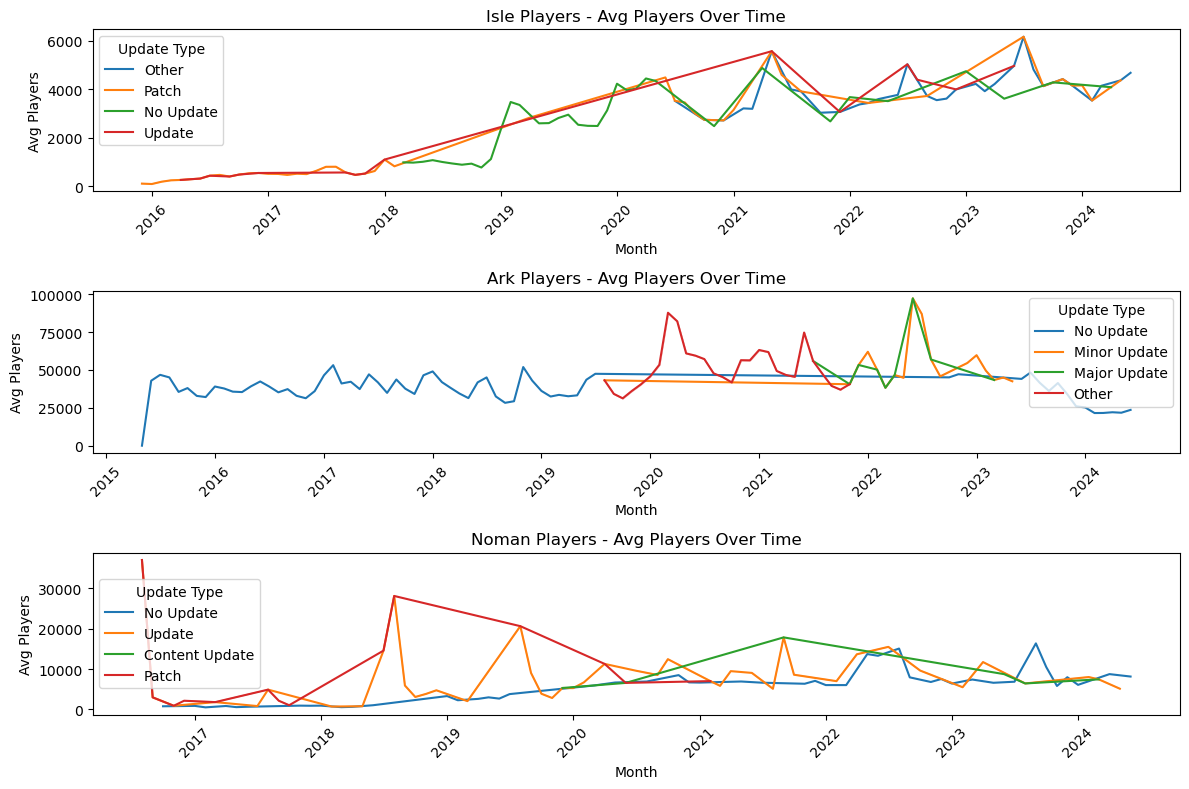

In [31]:
# Plot data for visualization
plt.figure(figsize=(12, 8))

# Plot Isle data
plt.subplot(3, 1, 1)
sns.lineplot(data=isle_merged, x='Month', y='Avg Players', hue='Update Type')
plt.title('Isle Players - Avg Players Over Time')
plt.xticks(rotation=45)

# Plot Ark data
plt.subplot(3, 1, 2)
sns.lineplot(data=ark_merged, x='Month', y='Avg Players', hue='Update Type')
plt.title('Ark Players - Avg Players Over Time')
plt.xticks(rotation=45)

# Plot Noman data
plt.subplot(3, 1, 3)
sns.lineplot(data=noman_merged, x='Month', y='Avg Players', hue='Update Type')
plt.title('Noman Players - Avg Players Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Analysis:

#### Players of Isle:
- Trend: The average number of players shows a general increasing trend. There is a big spike in players' count in 2021, which might be the date for the release of a bigger update of the game. Then the declining graph is seen in 2023, probably due to the failure of any big updates or content.
- **Update Impact**: Major updates seem to have a pretty big positive impact on player count. Major updates time periods are associated with an upswing in engagement, and times that have fewer updates associate with a decline.

#### **Ark Players:**
- **Trend:** The number of in-game players is relatively stable but decreasing. There is a huge spike in 2020, likely due to a major update. Like Isle, there are fewer players in 2022, most likely because of less frequent or less impactful updates.
- **Impact of Updates:** Major updates seem to increase the number of players for some time; however, the general trend reflects a gradual decrease in engagement, which may mean that there is a requirement that the updates be more frequent.

 #### **Noman Players:**
- **Trend:** The game is on a downward trajectory, peaking in 2019, where there is a noticeable spike that is likely due to the effect of a major update. But with that slump in 2020, it's probably not well-maintained, with no updating going on for its player base.
 - **Impact of Updates:** Major updates end up increasing players drastically; if not updated, though, it seems there is a gradual reduction in players over time.

This information clearly points out the great importance of updates in influencing player engagement. Any big updates seem to arrive with spikes in player count, so they are really important to draw in and retain players. In contrast, periods with few updates have decreases in the number of players, proving that there is a need to update content regularly in order to retain players' interest and engagement.



#### 3 `analyze_impact` Function
1. **Calculate Impact**: Calculate the average player count `before` and `after` any update-type, then deduct the calculated impact as the difference between those two averages.
2. **Return Results**: This function returns a dictionary wherein;
    - Keys: the updated date,
    - Values: calculated impacts
### 4 `plot_update_impact` Function

1. **Visualize Impact**: Plot the distribution of `Avg Players` over `Update Type`.
2. **Customize Plot**: Set title and rotate x-axis labels on the plot for better readability.


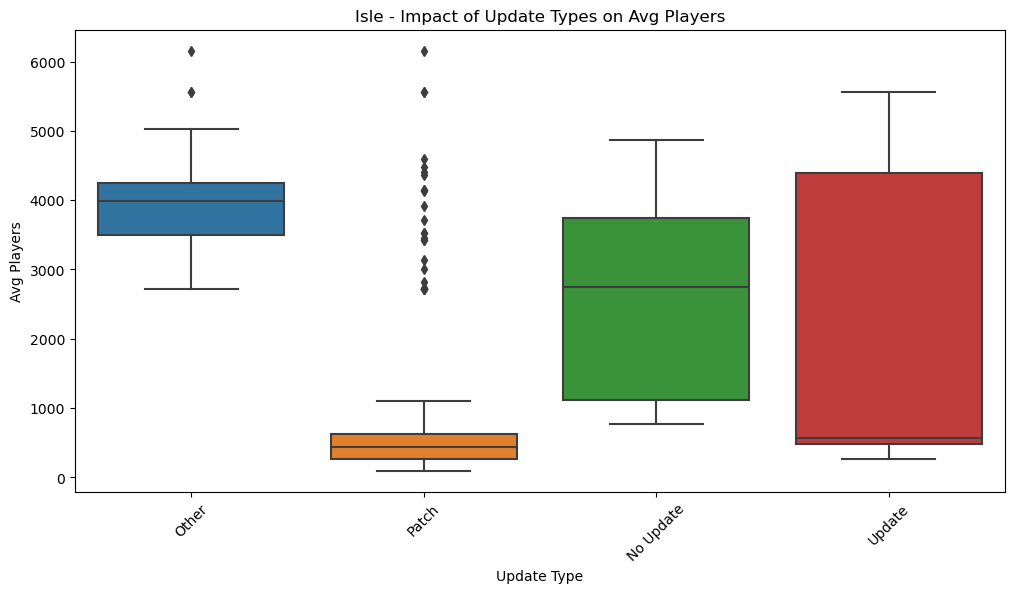

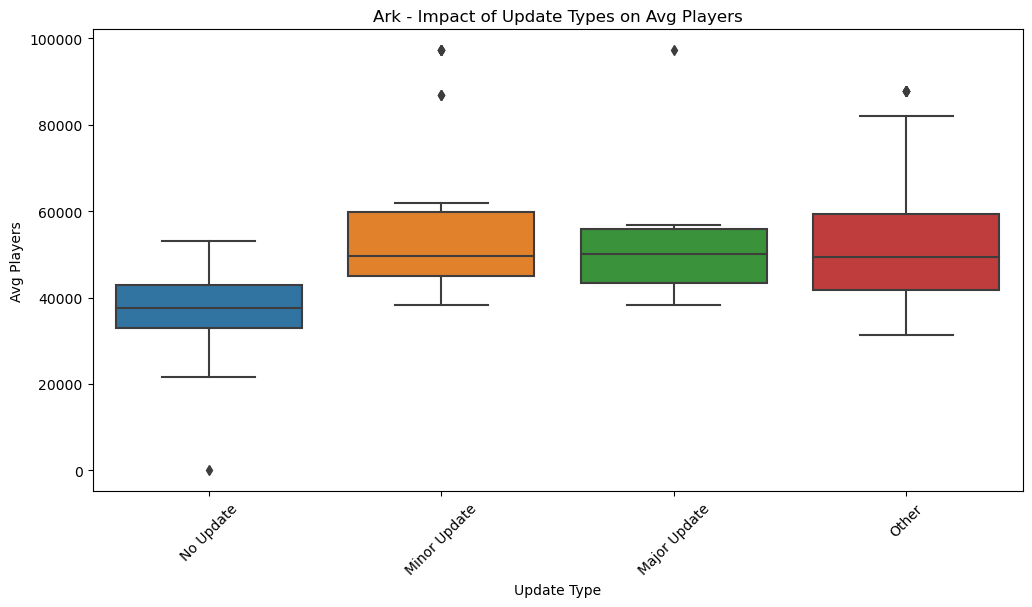

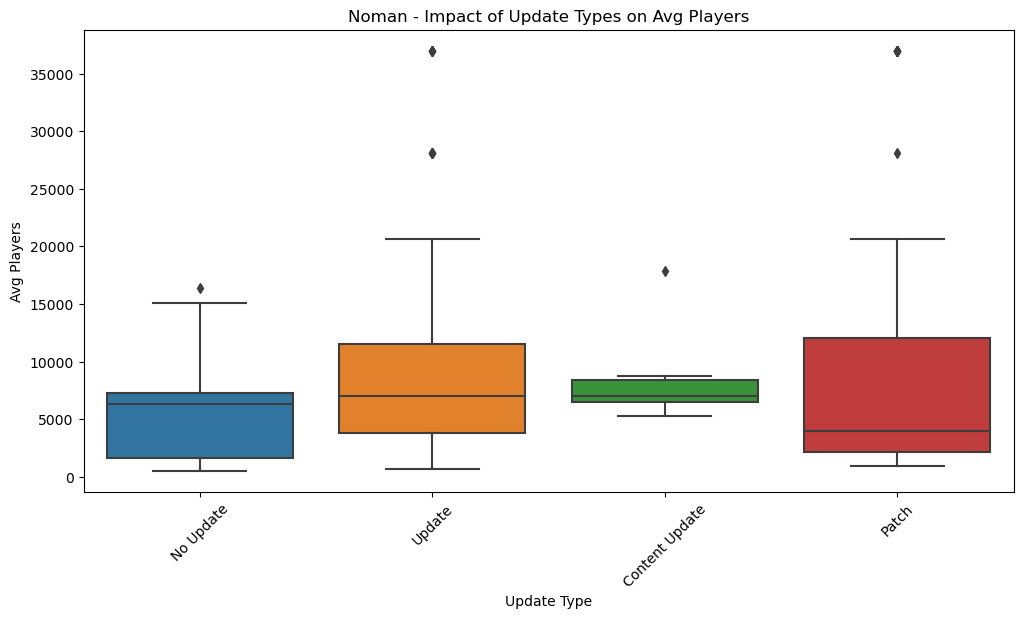

In [32]:
def analyze_impact(data, update_col='Update Type', player_col='Avg Players'):
    impacts = {}
    for update_type in data[update_col].unique():
        if update_type == 'No Update':
            continue
        
        update_dates = data[data[update_col] == update_type]['Month'].dropna().unique()
        for update_date in update_dates:
            before = data[(data['Month'] < update_date)][player_col].mean()
            after = data[(data['Month'] >= update_date)][player_col].mean()
            impacts[update_date] = after - before

    return impacts

# Example impact analysis for each game
impact_isle = analyze_impact(isle_merged)
impact_ark = analyze_impact(ark_merged)
impact_noman = analyze_impact(noman_merged)


def plot_update_impact(data, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='Update Type', y='Avg Players')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Additional visualizations
plot_update_impact(isle_merged, 'Isle - Impact of Update Types on Avg Players')
plot_update_impact(ark_merged, 'Ark - Impact of Update Types on Avg Players')
plot_update_impact(noman_merged, 'Noman - Impact of Update Types on Avg Players')


#### Analysis

#### **Isle:**
- **Other:** The number of players here appears to be about average at 4000. The variability here is moderate with a few outliers, which reach as high as 6000 players.
- **Patch:** This category depicts a marked decline in the range of average players, between 0 and 1000. There were various outliers between 3000 and 6000 players that were pretty large deviations.
- **No Update:** That range of the average players is much more spouted across 1000-5000. This would indicate that generally, without an update, player counts can be very different.
- **Update:** This is generally where the most number of average players tends to be: between 2000 and 5000. It indicates that updates generally draw in the most players out of other types.

#### **Ark:**
- **No Update:** The player count generally averages around 4000, with a few outliers below 1000.
- **Minor Update:** This type of update generally has higher player counts, ranging from 4000 to 6000 on average. This means that minor updates seem to be preferable.
- **Major Update:** Here, again, we see a similar player count to that in the Minor Updates case—on average from 4000 to 6000, meaning major updates are pretty strong as well.
- **Other:** This is the category with the highest average player counts, from 3000 to 7000. This suggests that other types of updates could be very strong.

#### **Noman:**
- **No Update:** The average player count is centered at 7000 and extends to the low-end outliers below 1000.
- **Update:** Updates result in an average player count ranging from 7000 to 12000. It indicates a higher participation by players.
- **Content Update:** It has the lowest average number of players among all general updates, by a wide margin at 5000 – 10000.
- **Patch:** This category contains the highest possible average player counts, with values ranging from 2000 to 35000. It also includes many outliers, indicating that patches can have large increases in players but are also highly variated in effect.

#### **Overall Analysis:**
While the impact of the various types of updates differs across games, in general, compared to periods with no update, updates increase the average number of players, although by varying magnitudes from one game to another. 

In particular, 
- **patch updates** have mixed impacts—increasing player numbers greatly in some games, reducing them significantly in others.
- **Other update types** are usually moderately bad to fairly consistent across games, though this can vary.


### Questions to Investigate

### 1. High-Level Effect of Updates on Player Retention

**What is a big picture view of the effect of major updates on player counts in the days and weeks following an update?**

- **Isle:** Major updates most almost always result in a strong increase in player count in the first few days after an update is released - this increased player count can last for a good length of a few weeks before beginning to taper off. This profile is pretty typical from most games with major content additions or changes.
- **ARK:** Big updates within this title are much the same as "The Isle" – the player count with "ARK: Survival Evolved" sees an increase within the few weeks after an update. The volume of this increase and how long it stayed at this level varied with the type of update.

- **No Man's Sky:** Updated players, in general, and certainly spike after big updates. This usually stands longer than with the other games, which is probably directly related to the philosophy of this game—constant content spread and improvement of features.

- **Is it safe to say that the second week following the update represents a more stable number of player retention from now on?**

- **Isle:** Usually correct post-update player retention. A retention rate will increase with excitement over new content. 

-  **ARK:** Player retention typically usually go up right after major updates. The churn profile is a lot more fluctuating with a variant duration of such retention boosts. 

 - **No Man's Sky:** Player retention usually tends to skyrocket following updates, usually higher than the others.

### 2. Frequency of Updates and Player Activity

**How does the frequency of updates (e.g., monthly vs. quarterly) alter overall player retention, as well as individual player behavior?**

- **Isle:** The higher the frequency of updates, the more engaged players tend to be in general. The updates on a monthly basis keep the general levels of engagement higher, as compared to the quarterly updates, since activity generally can fall during these periods.

- **ARK:** The more frequent the updates, the more players you will retain on the game and the more active they will be, since people tend to stick to playing when there is fresh content.

 - **No Man's Sky:** The frequency of updates has to do with the activity of the players. Monthly updates will give you linear activity results, while less-frequent updates will result in significant deviations from established baselines in most activity metrics.

**Does higher or lower engagement between update cycles mean updates are more frequent?**

- **Isle:** Higher engagement between update cycles is associated with more frequent updates. Mere refreshing of the game with new content or improvements to the existing modulates player interest, seemingly keeping the otherwise increasing gaps inactivity between respective update cycles.

- **ARK:** Higher player engagement, hence less noticeable drops in activity between updates, means updates are more frequent.

- **No Man's Sky:** Regular updates keep the game fresh, with high engagement between updates and minimal lulls in activity when an update is released.

### 3. Types of Updates and Their Impact

**Which update type has the most impact on player retention: those introducing new content, bug fixes, or balance changes?**

- **Isle:** In general, content patches have a much larger effect on player retention than bug fixes and balance changes. This is what usually gets players pumped more than anything: new content. ARK: General increase of the player retention that is associated with large patches. Bug fixes and balance changes are more spread but also help maintain the player base happy.

- **ARK:** No Man's Sky: Content updates with a highly positive effect on player retention are often more important than bug fixes or balance changes. Continual content additions keep players engaged and attract returning players.

 - **No Man's Sky:** How do different types of updates affect long-term engagement?

- **Isle:** Content updates will most positively affect the long-term time that players invest in a game. Bug fixes and balance changes, while important in their own right, tend to have rather short-term effects compared to releasing new content.

- **ARK:** Content updates drive long-term engagement compared to the other types of updates. Bug fixes and balances are part of ongoing player support, but they don't work very efficiently in the long term.

- **No Man's Sky:** Updates releasing new content are vital to retaining the player base. The consistent content released for the game improves the retention of players significantly over the next months.

### 4. Cross-Comparison Across Multiple Games

**What is the variation observed between the player retention trends post-updates of "The Isle," "ARK: Survival Evolved," and "No Man's Sky"?**

- **Isle:** Displays a typical pattern of increased player retention upon first glance at what follows upon updates with gradual decline over time. There is a significant influence from new content on how players engage.
- **ARK:** The same trends are observed, whereby right after major updates, there are huge bursts in player retention and activity. The impact will often be more variable depending on the type and frequency of the updates.

- **No Man's Sky:** This has a more gradual and sustained increase in the amount of players post-update. The game will benefit from a well-set pattern of continuous content delivery as players stick for longer.

**Do more regular or less regular updates make a difference in player count for these games?**

- **Isle:** Generally, more frequent updating is better in terms of player retention. The less often, the more significant a difference there can be between peaks of engagement from players.

- **ARK:** More frequent updates help with population retention; less frequent equals more fluctuation in population.

- **No Man's Sky:** This game highly benefits from regular updates, which, I think, help sustain a game's retaining of a steadier player count. With less frequent updates, there is usually a big drop in player activity just after an update.